In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [140]:
def f (t,u):
  return 10*np.exp(-(t-2)*(t-2)/(2*(0.075)**2 ))- 0.6*u

In [141]:
def rk_3(f,t,u,h):
  k1 = f(t,u)
  k2 = f(t + h/2, u + k1/2)
  k3 = f(t + 3*h/4, u + k2*3*h/4)
  k4 = f(t + h, u + (h/9)*(2*k1 + 3*k2 + 4*k3))
  return u + (h/9)*(2*k1 + 3*k2 + 4*k3)

def rk3_2(f,t,u,h):
  k1 = f(t,u)
  k2 = f(t + h/2, u + k1/2)
  k3 = f(t + 3*h/4, u + k2*3*h/4)
  k4 = f(t + h, u + (h/9)*(2*k1 + 3*k2 + 4*k3))
  return u + (h/24)*(7*k1 + 6*k2 + 8*k3 + 3*k4)

In [174]:
def adapted_step(f, u0, tf, tol ):
    u = [u0]
    u1 = [u0]
    h = 0.1
    ts = [0]
    t = ts[-1]
    while t < tf:
        u_ = rk_3(f,t,u[-1],h)
        u_1 = rk3_2(f,t,u[-1],h)
        while abs(u_1 - u_) > tol:
            h = h/2
            u_ = rk_3(f,t,u[-1],h)
            u_1 = rk3_2(f,t,u[-1],h)
        h = h*(tol/abs(u_-u_1))**(1/2)
        u.append(u_)
        u1.append(u_1)
        t =t+ h
        ts.append(t)
    return u,u1, ts

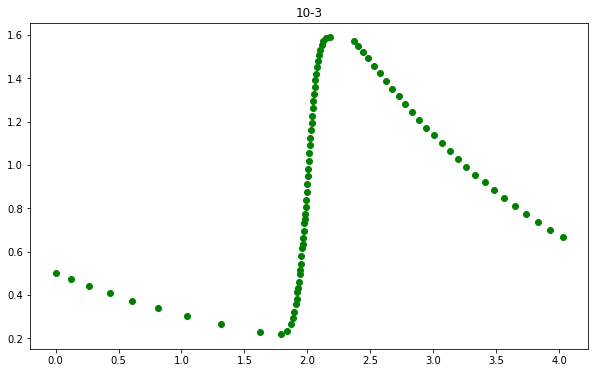

In [179]:
u, u1, ts = adapted_step(f, 0.5,4 ,1e-3)
plt.figure(figsize=(10, 6))
plt.plot(ts, u, 'go')
plt.title('10-3')
plt.show()

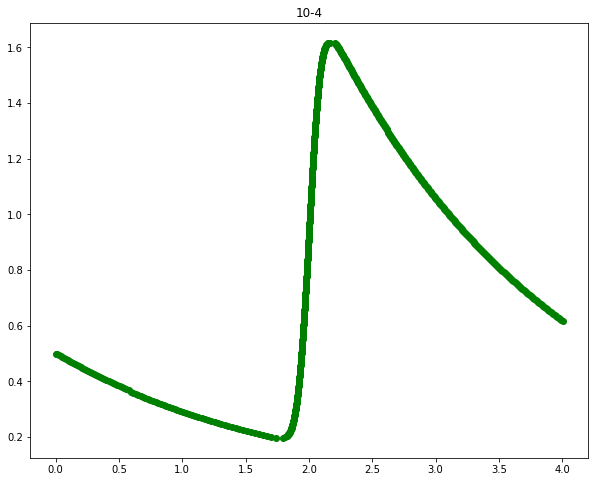

In [181]:
u, u1, ts = adapted_step(f, 0.5,4 ,1e-4)
plt.figure(figsize=(10, 8))
plt.plot(ts, u, 'go')
plt.title('10-4')
plt.show()